# Latar Belakang

Ada sebuah supermarket xyz ingin menganalisa tentang perusahaannya berdasarkan 4 katagori yaitu berdasarkan Customer, Product, Campaign dan Place/Tempat Penjualannya.

# Perumusan Masalah

Supermarket memiliki banyak analisa yang harus dilakukan salah satu permasalahan yang dialami dari supermarket adalah penurunannya penjualan mungkin bisa dianalisa melalui 4 kategori yang terdapat pada dataset yang diberikan

1. Customer: Bagaimana karakteristik pelanggan memengaruhi pola pembelian mereka
2. Product: Produk apa yang paling populer dan bagaimana kaitannya dengan
pelanggan atau promosi?
3. Campaign: Seberapa efektif kampanye pemasaran yang ada?
4. Place/Sales Location: Bagaimana perbedaan perilaku pembelian di berbagai saluran penjualan (toko, web, katalog)?

# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Retrieve Dataset from GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/Purwadhika_Training/DB/"

In [4]:
supermarket_dataset = pd.read_csv(
    f"{dataset_path}Supermarket_Customers.csv",
    delimiter="\t"
    )

In [5]:
supermarket_dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [6]:
supermarket_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Check Data Formatting

In [7]:
supermarket_dataset['Dt_Customer'] = pd.to_datetime(supermarket_dataset['Dt_Customer'], format='%d-%m-%Y')
# Membuat kolom 'Age' dari 'Year_Birth'
supermarket_dataset['Age'] = 2025 - supermarket_dataset['Year_Birth']

## Check Duplicate Data

In [8]:
# Memeriksa data duplikat
duplicate = supermarket_dataset.duplicated().sum()
if duplicate == 0:
  print("No duplicate data")
else:
  print(f"There are {duplicate} duplicate data")

No duplicate data


## Check Missing Value

In [9]:
# Memeriksa nilai yang hilang
missing_value = supermarket_dataset.isnull().sum()

if missing_value.sum() == 0:
  print("No missing value")
else:
  print(f"There are {missing_value.sum()} missing value\n")
  print(missing_value)

There are 24 missing value

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64


### Delete Missing Value

In [10]:
# Menghapus baris dengan nilai yang hilang
supermarket_cleaned = supermarket_dataset.dropna().copy()
# Menampilkan informasi dataset setelah menghapus nilai yang hilang
supermarket_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

## Check Outlier Data

In [11]:
# Mendefinisikan kolom numerik untuk diperiksa outlier (tidak termasuk ID, Z_CostContact, Z_Revenue yang merupakan identifier atau konstanta)
numerical_columns_for_outlier_detection = supermarket_cleaned.select_dtypes(include=np.number).columns.tolist()
columns_to_exclude = ['ID', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']
numerical_columns_for_outlier_detection = [col for col in numerical_columns_for_outlier_detection if col not in columns_to_exclude]

outlier_counts = {}

# Melakukan perulangan melalui setiap kolom numerik untuk deteksi outlier
for col in numerical_columns_for_outlier_detection:
    Q1 = supermarket_cleaned[col].quantile(0.25)
    Q3 = supermarket_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi baris yang merupakan outlier di kolom saat ini
    outliers = supermarket_cleaned[(supermarket_cleaned[col] < lower_bound) | (supermarket_cleaned[col] > upper_bound)]

    # Menyimpan jumlah outlier untuk kolom saat ini
    outlier_counts[col] = outliers.shape[0]

# Menampilkan jumlah outlier untuk setiap kolom numerik
print("Jumlah Outlier (excluding 'ID', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response'):\n")
display(outlier_counts)

Jumlah Outlier (excluding 'ID', 'Z_CostContact', 'Z_Revenue', 'Response', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response'):



{'Year_Birth': 3,
 'Income': 8,
 'Kidhome': 0,
 'Teenhome': 0,
 'Recency': 0,
 'MntWines': 35,
 'MntFruits': 246,
 'MntMeatProducts': 174,
 'MntFishProducts': 222,
 'MntSweetProducts': 246,
 'MntGoldProds': 205,
 'NumDealsPurchases': 84,
 'NumWebPurchases': 3,
 'NumCatalogPurchases': 23,
 'NumStorePurchases': 0,
 'NumWebVisitsMonth': 8,
 'Age': 3}

In [12]:
# # INSIGHT TAMBAHAN

# # Membuat salinan data untuk di-filter
# supermarket_filtered = supermarket_cleaned.copy()

# # Loop untuk setiap kolom numerik dan filter outlier
# for col in numerical_columns_for_outlier_detection:
#     Q1 = supermarket_filtered[col].quantile(0.25)
#     Q3 = supermarket_filtered[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter outlier
#     supermarket_filtered = supermarket_filtered[(supermarket_filtered[col] >= lower_bound) & (supermarket_filtered[col] <= upper_bound)]

# # Hasil data setelah menghapus outlier
# print(f"Jumlah baris sebelum filter: {supermarket_cleaned.shape[0]}")
# print(f"Jumlah baris setelah filter: {supermarket_filtered.shape[0]}")


In [13]:
# supermarket_filtered

# Data Analysis

## Analisis data pelanggan (customer analysis)


In [14]:
# Hitung statistik deskriptif untuk 'Age' dan 'Income'
age_income_desc = supermarket_cleaned[['Age', 'Income']].describe()
print("Descriptive Statistics for Age and Income:")
display(age_income_desc)

# Hitung total pengeluaran ('MntTotal')
supermarket_cleaned['MntTotal'] = supermarket_cleaned['MntWines'] + supermarket_cleaned['MntFruits'] + supermarket_cleaned['MntMeatProducts'] + supermarket_cleaned['MntFishProducts'] + supermarket_cleaned['MntSweetProducts'] + supermarket_cleaned['MntGoldProds']

# Kelompokkan data berdasarkan 'Education' dan hitung rata-rata 'MntTotal'
mnt_total_by_education = supermarket_cleaned.groupby('Education')['MntTotal'].mean().reset_index()
print("\nAverage Total Spending by Education Level:")
display(mnt_total_by_education)

# Kelompokkan data berdasarkan 'Marital_Status' dan hitung rata-rata 'MntTotal'
mnt_total_by_marital_status = supermarket_cleaned.groupby('Marital_Status')['MntTotal'].mean().reset_index()
print("\nAverage Total Spending by Marital Status:")
display(mnt_total_by_marital_status)

Descriptive Statistics for Age and Income:


,Age,Income
count,2216.000000,2216.000000
mean,56.179603,52247.251354
std,11.985554,25173.076661
min,29.000000,1730.000000
25%,48.000000,35303.000000
50%,55.000000,51381.500000
75%,66.000000,68522.000000
max,132.000000,666666.000000



Average Total Spending by Education Level:


,Education,MntTotal
0,2n Cycle,494.930000
1,Basic,81.796296
2,Graduation,621.686380
3,Master,609.767123
4,PhD,676.733888



Average Total Spending by Marital Status:


,Marital_Status,MntTotal
0,Absurd,1192.500000
1,Alone,256.666667
2,Divorced,610.629310
3,Married,591.464411
4,Single,612.592357
5,Together,608.846422
6,Widow,727.960526
7,YOLO,424.000000


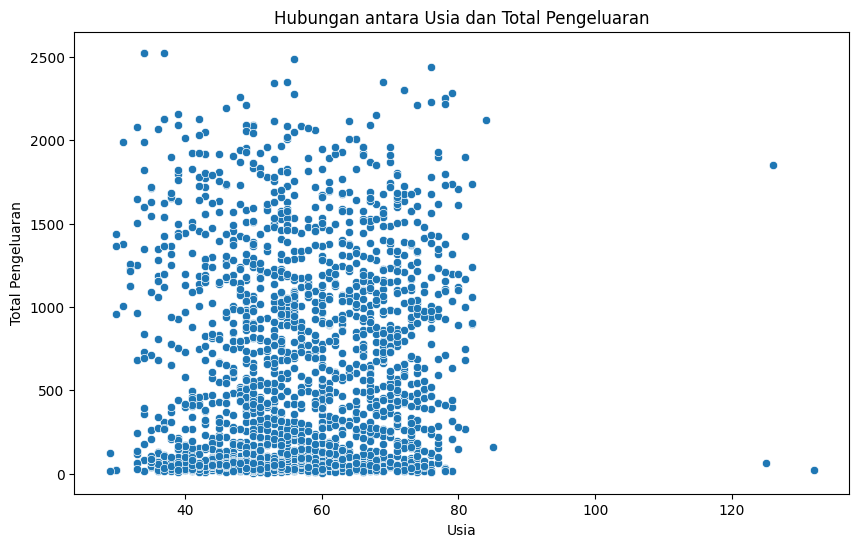

In [15]:
# scatter plot untuk Age vs MntTotal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supermarket_cleaned, x='Age', y='MntTotal')
plt.title('Hubungan antara Usia dan Total Pengeluaran')
plt.xlabel('Usia')
plt.ylabel('Total Pengeluaran')
plt.show()

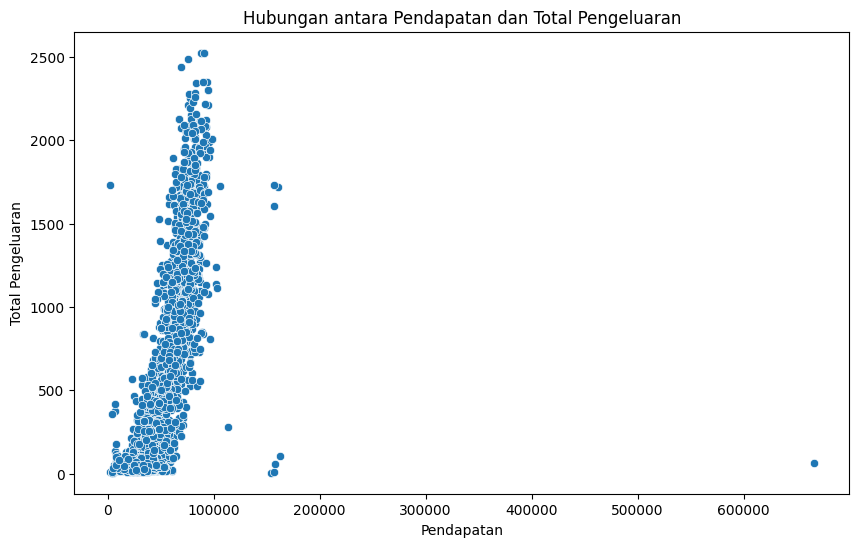

In [16]:
# scatter plot untuk Income vs MntTotal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supermarket_cleaned, x='Income', y='MntTotal')
plt.title('Hubungan antara Pendapatan dan Total Pengeluaran')
plt.xlabel('Pendapatan')
plt.ylabel('Total Pengeluaran')
plt.show()

/tmp/ipython-input-17-2656982623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mnt_total_by_education, x='Education', y='MntTotal', palette='viridis')


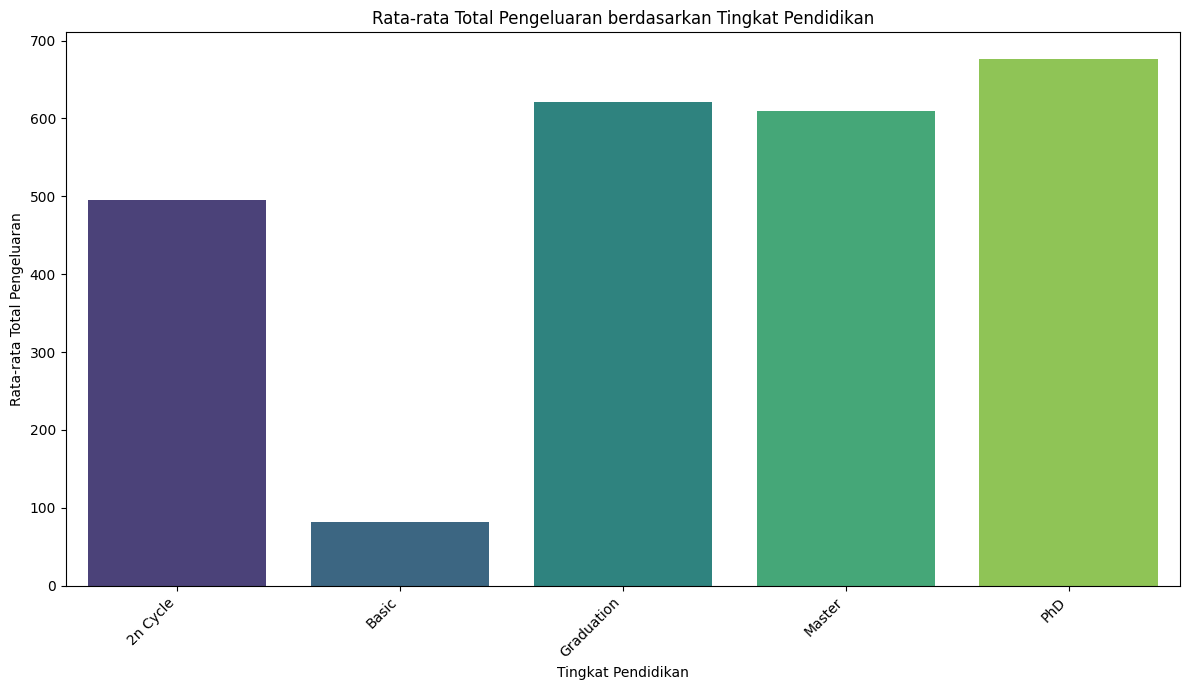

In [17]:
# bar plot untuk rata-rata MntTotal berdasarkan Education
plt.figure(figsize=(12, 7))
sns.barplot(data=mnt_total_by_education, x='Education', y='MntTotal', palette='viridis')
plt.title('Rata-rata Total Pengeluaran berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata Total Pengeluaran')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-700869254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mnt_total_by_marital_status, x='Marital_Status', y='MntTotal', palette='viridis')


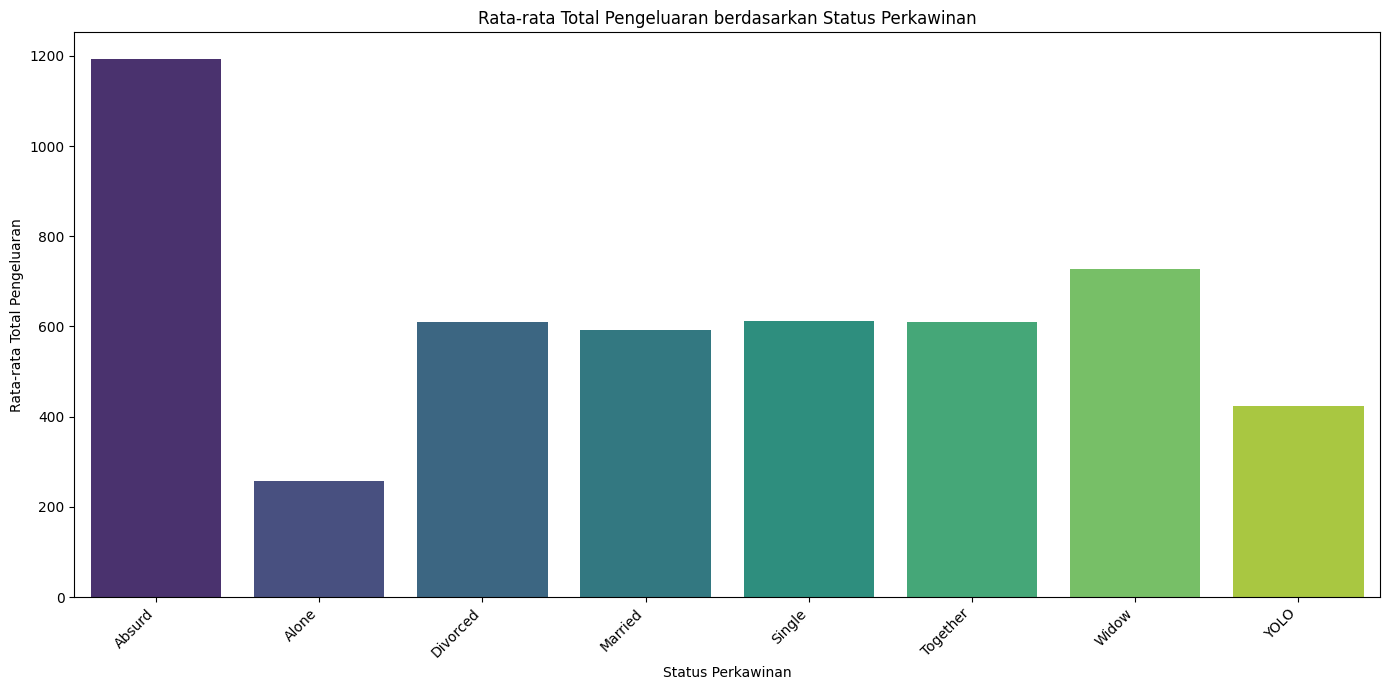

In [18]:
# bar plot untuk rata-rata MntTotal berdasarkan Marital_Status
plt.figure(figsize=(14, 7))
sns.barplot(data=mnt_total_by_marital_status, x='Marital_Status', y='MntTotal', palette='viridis')
plt.title('Rata-rata Total Pengeluaran berdasarkan Status Perkawinan')
plt.xlabel('Status Perkawinan')
plt.ylabel('Rata-rata Total Pengeluaran')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Statistik Deskriptif

* **Usia**

  * Rata-rata pelanggan berusia 56 tahun, dengan rentang 29 – 132 tahun.
  * Outlier usia tinggi dibiarkan karena jumlahnya sedikit tetapi memengaruhi distribusi bila dihapus.

* **Pendapatan**

  * Rata-rata pendapatan sebesar 52 247 dengan deviasi standar ±25 173, menunjukkan variasi besar antarpelanggan.
  * Outlier pendapatan tinggi juga dipertahankan demi menjaga representasi data.

---

Insight Visualisasi

* **Usia vs. Total Pengeluaran**

  * Tidak tampak korelasi linear; pelanggan di setiap kelompok usia berbelanja dalam rentang yang luas.

* **Pendapatan vs. Total Pengeluaran**

  * Terlihat tren positif: makin tinggi pendapatan, cenderung makin besar pengeluaran, walau variasinya tetap besar.

* **Rata-rata Pengeluaran per Tingkat Pendidikan**

  * Pelanggan berpendidikan **PhD** dan **Graduation** membelanjakan paling tinggi.
  * Pelanggan dengan pendidikan **Basic** membelanjakan paling rendah.

* **Rata-rata Pengeluaran per Status Perkawinan**

  * Kategori **Absurd** dan **Widow** menunjukkan rata-rata belanja tertinggi, tetapi *Absurd* sangat sedikit sampelnya.
  * **Alone** mencatat rata-rata belanja terendah.
  * **Married**, **Single**, dan **Together** memiliki pola belanja yang mirip.

---

Kesimpulan Pengaruh Karakteristik terhadap Pembelian

* **Pendapatan** merupakan penentu utama: pelanggan berpendapatan tinggi umumnya berbelanja lebih banyak.
* **Tingkat pendidikan** berpengaruh; pendidikan lebih tinggi (PhD, Graduation) terkait dengan pengeluaran lebih besar.
* **Usia** tidak menunjukkan hubungan linear jelas dengan total pengeluaran.
* **Status perkawinan** memengaruhi rata-rata belanja, namun interpretasi perlu hati-hati karena beberapa kategori (mis. *Absurd*) berukuran sampel sangat kecil.


## Analisis produk (product analysis)

In [19]:
# Hitung total pengeluaran untuk setiap kategori produk
product_spending = supermarket_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()
product_spending.columns = ['Product Category', 'Total Spending']

# Identifikasi produk atau kategori produk dengan total pengeluaran tertinggi
most_popular_by_spending = product_spending.sort_values(by='Total Spending', ascending=False)

print("Total Spending by Product Category:")
display(product_spending)
print("\nMost Popular Products by Total Spending:")
display(most_popular_by_spending)

Total Spending by Product Category:


,Product Category,Total Spending
0,MntWines,676083
1,MntFruits,58405
2,MntMeatProducts,370063
3,MntFishProducts,83405
4,MntSweetProducts,59896
5,MntGoldProds,97427



Most Popular Products by Total Spending:


,Product Category,Total Spending
0,MntWines,676083
2,MntMeatProducts,370063
5,MntGoldProds,97427
3,MntFishProducts,83405
4,MntSweetProducts,59896
1,MntFruits,58405


In [20]:
# Hitung jumlah pembelian untuk setiap kategori pembelian/saluran
purchase_counts = supermarket_cleaned[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum().reset_index()
purchase_counts.columns = ['Purchase Channel', 'Total Purchases']

# Identifikasi saluran pembelian dengan jumlah pembelian tertinggi
most_popular_channel = purchase_counts.sort_values(by='Total Purchases', ascending=False)

print("\nTotal Purchases by Channel:")
display(purchase_counts)
print("\nMost Popular Purchase Channel:")
display(most_popular_channel)


Total Purchases by Channel:


,Purchase Channel,Total Purchases
0,NumWebPurchases,9053
1,NumCatalogPurchases,5919
2,NumStorePurchases,12855
3,NumDealsPurchases,5149



Most Popular Purchase Channel:


,Purchase Channel,Total Purchases
2,NumStorePurchases,12855
0,NumWebPurchases,9053
1,NumCatalogPurchases,5919
3,NumDealsPurchases,5149


In [21]:
# Analisis kaitan produk populer (Wines) dengan karakteristik pelanggan

# Kelompokkan berdasarkan 'Education' dan hitung rata-rata pengeluaran untuk Wines
avg_wine_spending_by_education = supermarket_cleaned.groupby('Education')['MntWines'].mean().reset_index()
print("\nAverage Wine Spending by Education Level:")
display(avg_wine_spending_by_education.sort_values(by='MntWines', ascending=False))

# Kelompokkan berdasarkan 'Marital_Status' dan hitung rata-rata pengeluaran untuk Wines
avg_wine_spending_by_marital_status = supermarket_cleaned.groupby('Marital_Status')['MntWines'].mean().reset_index()
print("\nAverage Wine Spending by Marital Status:")
display(avg_wine_spending_by_marital_status.sort_values(by='MntWines', ascending=False))


Average Wine Spending by Education Level:


,Education,MntWines
4,PhD,407.222453
3,Master,332.980822
2,Graduation,285.045699
0,2n Cycle,200.845000
1,Basic,7.240741



Average Wine Spending by Marital Status:


,Marital_Status,MntWines
6,Widow,367.131579
0,Absurd,355.500000
2,Divorced,324.844828
7,YOLO,322.000000
5,Together,308.403141
3,Married,299.855309
4,Single,291.331210
1,Alone,184.666667


In [22]:
# Analisis kaitan produk populer (Wines) dengan kampanye pemasaran

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
avg_wine_spending_by_campaign = {}

for cmp in campaign_cols:
    avg_spending = supermarket_cleaned.groupby(cmp)['MntWines'].mean().reset_index()
    avg_spending[cmp] = avg_spending[cmp].map({0: f'Did not Accept {cmp}', 1: f'Accepted {cmp}'})
    avg_spending.columns = ['Campaign Status', 'Average Wine Spending']
    avg_wine_spending_by_campaign[cmp] = avg_spending

print("\nAverage Wine Spending by Campaign Acceptance Status:")
for cmp, df in avg_wine_spending_by_campaign.items():
    print(f"\n{cmp}:")
    display(df)


Average Wine Spending by Campaign Acceptance Status:

AcceptedCmp1:


,Campaign Status,Average Wine Spending
0,Did not Accept AcceptedCmp1,274.080521
1,Accepted AcceptedCmp1,758.028169



AcceptedCmp2:


,Campaign Status,Average Wine Spending
0,Did not Accept AcceptedCmp2,296.945563
1,Accepted AcceptedCmp2,898.666667



AcceptedCmp3:


,Campaign Status,Average Wine Spending
0,Did not Accept AcceptedCmp3,299.250852
1,Accepted AcceptedCmp3,378.656442



AcceptedCmp4:


,Campaign Status,Average Wine Spending
0,Did not Accept AcceptedCmp4,269.515107
1,Accepted AcceptedCmp4,750.231707



AcceptedCmp5:


,Campaign Status,Average Wine Spending
0,Did not Accept AcceptedCmp5,260.240019
1,Accepted AcceptedCmp5,873.765432


/tmp/ipython-input-23-1176863320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_wine_spending_by_education.sort_values(by='MntWines', ascending=False), x='Education', y='MntWines', palette='viridis')


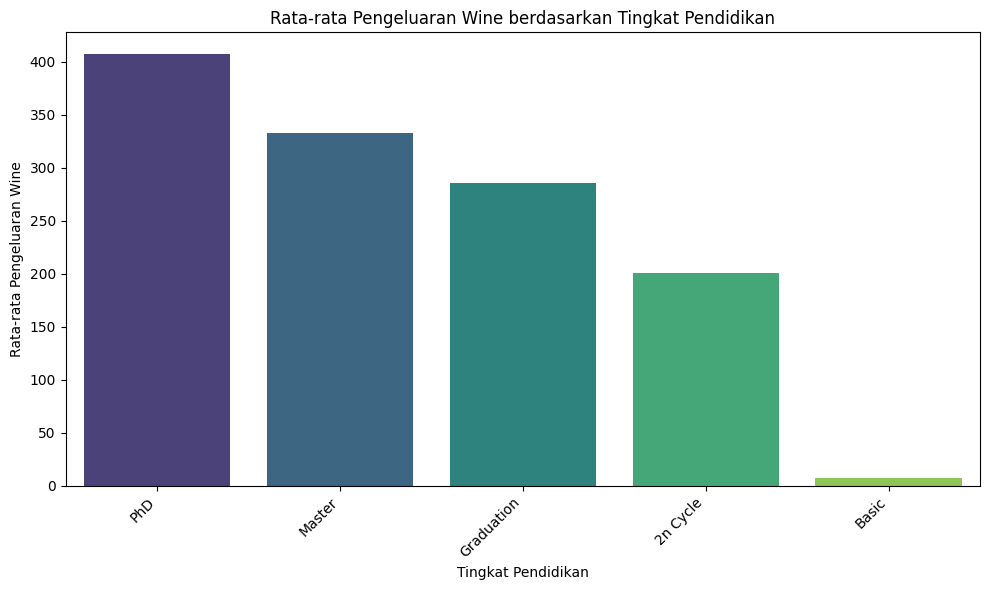

In [23]:
# Sajikan temuan dalam bentuk visualisasi

# Bar plot untuk rata-rata pengeluaran Wine berdasarkan Tingkat Pendidikan
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_wine_spending_by_education.sort_values(by='MntWines', ascending=False), x='Education', y='MntWines', palette='viridis')
plt.title('Rata-rata Pengeluaran Wine berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Rata-rata Pengeluaran Wine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-3164738473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_wine_spending_by_marital_status.sort_values(by='MntWines', ascending=False), x='Marital_Status', y='MntWines', palette='magma')


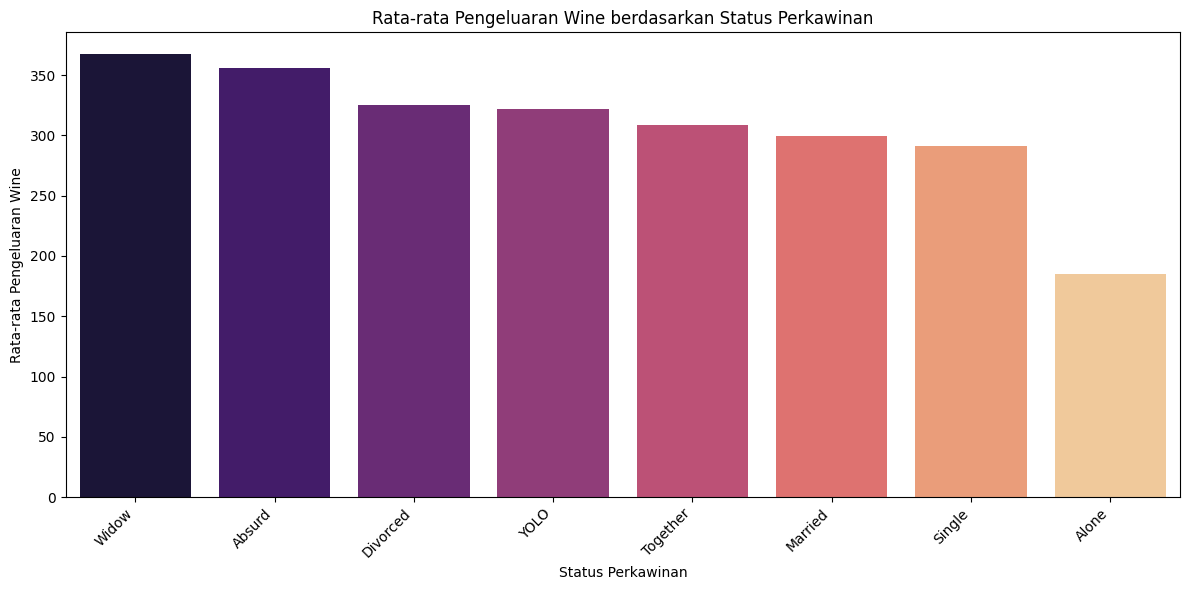

In [24]:
# Bar plot untuk rata-rata pengeluaran Wine berdasarkan Status Perkawinan
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_wine_spending_by_marital_status.sort_values(by='MntWines', ascending=False), x='Marital_Status', y='MntWines', palette='magma')
plt.title('Rata-rata Pengeluaran Wine berdasarkan Status Perkawinan')
plt.xlabel('Status Perkawinan')
plt.ylabel('Rata-rata Pengeluaran Wine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-1040661383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')


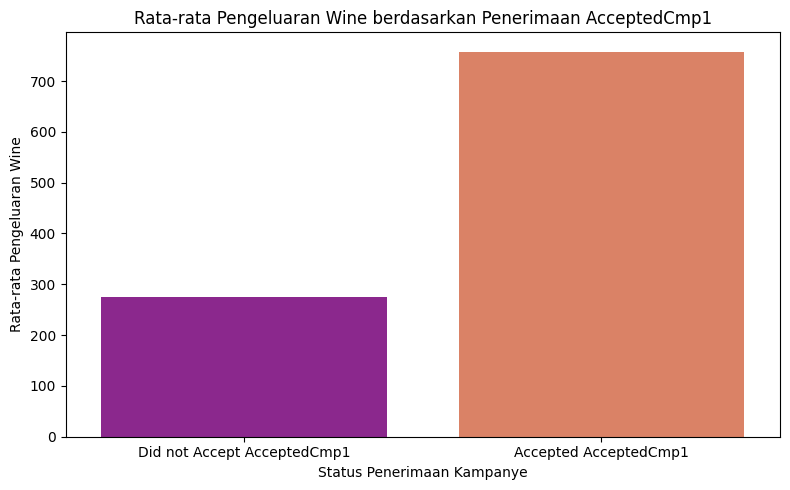

/tmp/ipython-input-25-1040661383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')


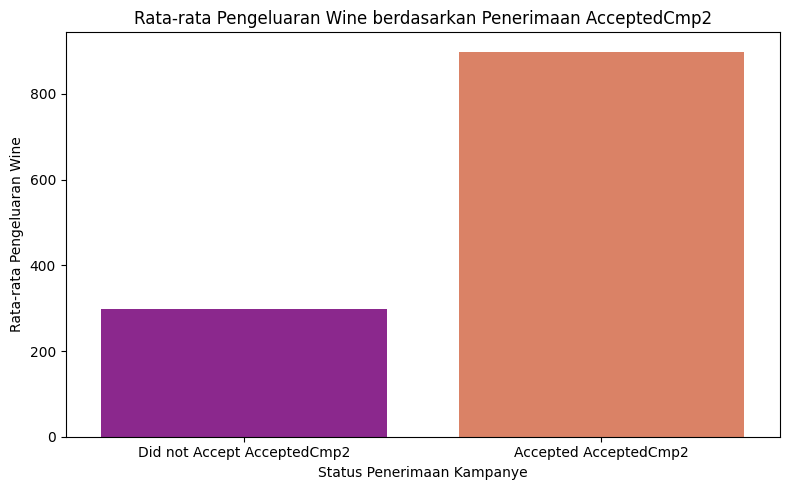

/tmp/ipython-input-25-1040661383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')


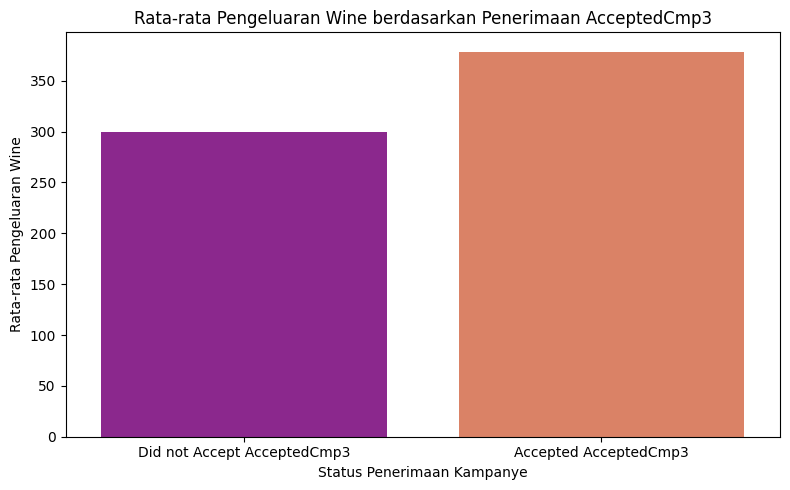

/tmp/ipython-input-25-1040661383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')


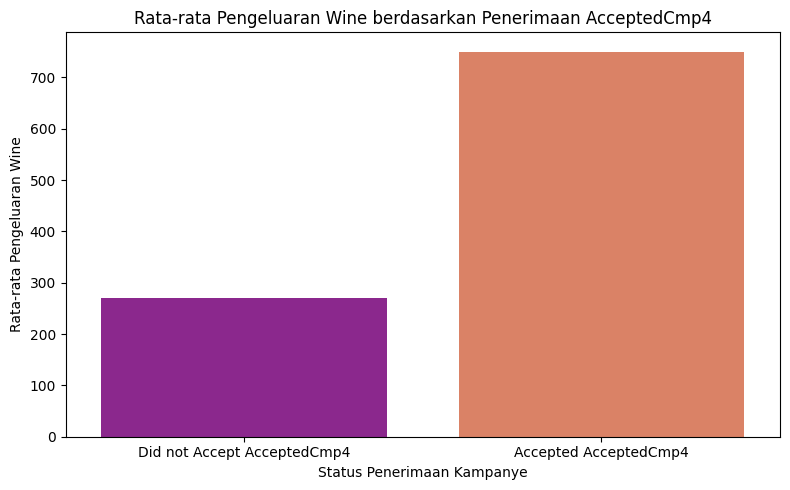

/tmp/ipython-input-25-1040661383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')


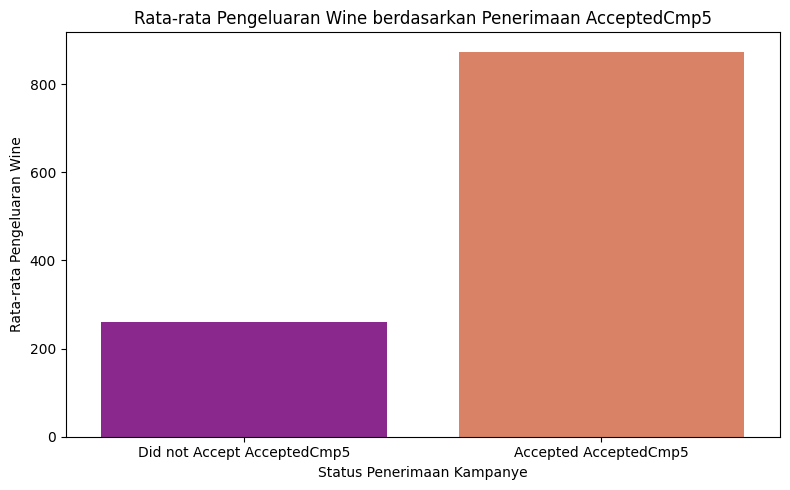

In [25]:
# Bar plots untuk rata-rata pengeluaran Wine berdasarkan status penerimaan kampanye
for cmp, df in avg_wine_spending_by_campaign.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x='Campaign Status', y='Average Wine Spending', palette='plasma')
    plt.title(f'Rata-rata Pengeluaran Wine berdasarkan Penerimaan {cmp}')
    plt.xlabel('Status Penerimaan Kampanye')
    plt.ylabel('Rata-rata Pengeluaran Wine')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

Ringkasan Temuan Produk & Saluran

* **Produk terlaris** → **Wine** (total belanja ≈ 676 k), diikuti Meat, Gold, Fish, Sweet, dan Fruits.
* **Saluran terpopuler** → **Store Purchases** (12 855 transaksi), lalu Web, Catalog, dan Deals.

Wine × Karakteristik Pelanggan

* **Pendidikan**: PhD & Master membelanjakan Wine paling besar; Basic paling rendah.
* **Status perkawinan**: Widow & Absurd (sampel kecil) belanja tertinggi; Alone terendah.
* **Intinya**: Semakin tinggi pendidikan --> pengeluaran Wine lebih tinggi.

Wine × Kampanye Pemasaran

Pelanggan yang **menerima kampanye AcceptedCmp1-5** selalu menunjukkan rata-rata belanja Wine jauh lebih tinggi daripada yang menolak ⇒ semua kampanye efektif mendorong pembelian Wine.

Catatan Outlier

* Usia & pendapatan ekstrem dipertahankan; mereka bisa memengaruhi rata-rata, tetapi juga mewakili segmen **high-value**.
* Outlier belanja di Meat, Fish, Sweet, Gold, Fruits menandakan adanya pelanggan premium; layak dianalisis terpisah.

Rekomendasi Tindak Lanjut

1. **Fokus kampanye Wine** pada pelanggan berpendidikan tinggi.
2. **Segmentasi status perkawinan**: rancang pesan khusus untuk Widow & Divorced yang cenderung belanja lebih banyak.
3. **Optimalkan kampanye AcceptedCmp1-5** (terbukti efektif); pelajari elemen suksesnya.
4. Identifikasi dan kelola **pelanggan high-value** di kategori produk lain untuk upsell/retensi.
5. Selidiki **profitabilitas tiap saluran** meski Store dominan, guna alokasi sumber daya lebih tepat.


## Analisis kampanye (campaign analysis)

In [26]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_acceptance = {}

for cmp in campaign_cols:
    # Calculate acceptance counts
    acceptance_counts = supermarket_cleaned[cmp].value_counts().reset_index()
    acceptance_counts.columns = ['Accepted', 'Count']
    acceptance_counts['Accepted'] = acceptance_counts['Accepted'].map({0: 'Did not Accept', 1: 'Accepted'})

    # Calculate acceptance percentage
    total_customers = acceptance_counts['Count'].sum()
    acceptance_counts['Percentage'] = (acceptance_counts['Count'] / total_customers) * 100

    campaign_acceptance[cmp] = acceptance_counts

    # Calculate average total spending by campaign acceptance
    avg_spending = supermarket_cleaned.groupby(cmp)['MntTotal'].mean().reset_index()
    avg_spending[cmp] = avg_spending[cmp].map({0: f'Did not {cmp}', 1: f'{cmp}'})
    avg_spending.columns = ['Campaign Status', 'Average Total Spending']
    avg_wine_spending_by_campaign[cmp] = avg_spending


print("Campaign Acceptance Counts and Percentage:")
for cmp, df in campaign_acceptance.items():
    print(f"\n{cmp}:")
    display(df)

print("\nAverage Total Spending by Campaign Acceptance Status:")
for cmp, df in avg_wine_spending_by_campaign.items():
    print(f"\n{cmp}:")
    display(df)

Campaign Acceptance Counts and Percentage:

AcceptedCmp1:


,Accepted,Count,Percentage
0,Did not Accept,2074,93.592058
1,Accepted,142,6.407942



AcceptedCmp2:


,Accepted,Count,Percentage
0,Did not Accept,2186,98.646209
1,Accepted,30,1.353791



AcceptedCmp3:


,Accepted,Count,Percentage
0,Did not Accept,2053,92.644404
1,Accepted,163,7.355596



AcceptedCmp4:


,Accepted,Count,Percentage
0,Did not Accept,2052,92.599278
1,Accepted,164,7.400722



AcceptedCmp5:


,Accepted,Count,Percentage
0,Did not Accept,2054,92.689531
1,Accepted,162,7.310469



Average Total Spending by Campaign Acceptance Status:

AcceptedCmp1:


,Campaign Status,Average Total Spending
0,Did not AcceptedCmp1,547.011572
1,AcceptedCmp1,1484.345070



AcceptedCmp2:


,Campaign Status,Average Total Spending
0,Did not AcceptedCmp2,597.460659
1,AcceptedCmp2,1307.666667



AcceptedCmp3:


,Campaign Status,Average Total Spending
0,Did not AcceptedCmp3,598.066732
1,AcceptedCmp3,720.539877



AcceptedCmp4:


,Campaign Status,Average Total Spending
0,Did not AcceptedCmp4,564.677875
1,AcceptedCmp4,1137.560976



AcceptedCmp5:


,Campaign Status,Average Total Spending
0,Did not AcceptedCmp5,527.466894
1,AcceptedCmp5,1616.432099


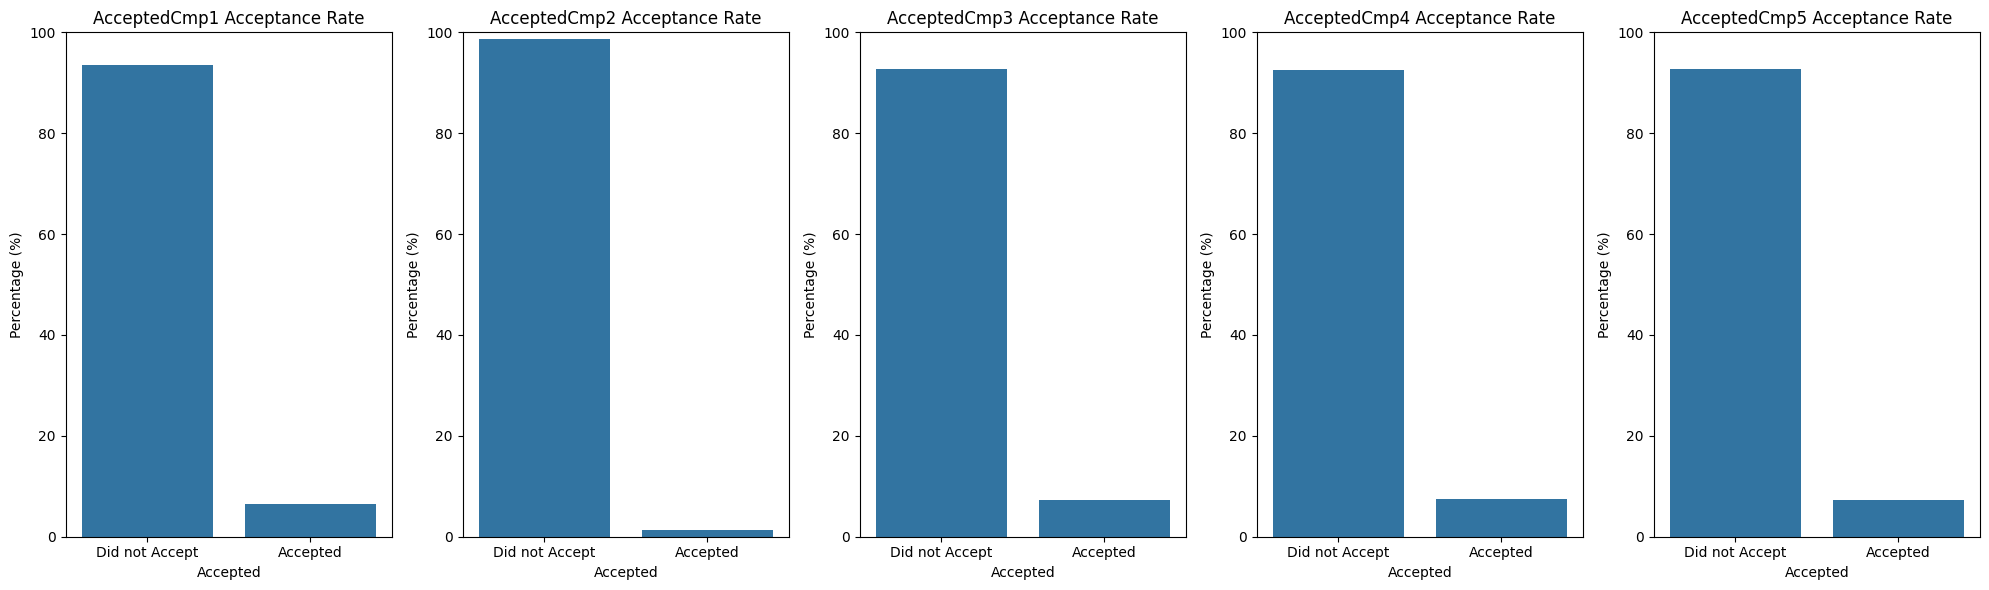

In [27]:
# bar plots for campaign acceptance percentage
plt.figure(figsize=(20, 6))
for i, (cmp, df) in enumerate(campaign_acceptance.items()):
    plt.subplot(1, 5, i + 1)
    sns.barplot(data=df, x='Accepted', y='Percentage')
    plt.title(f'{cmp} Acceptance Rate')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
plt.tight_layout()
plt.show()

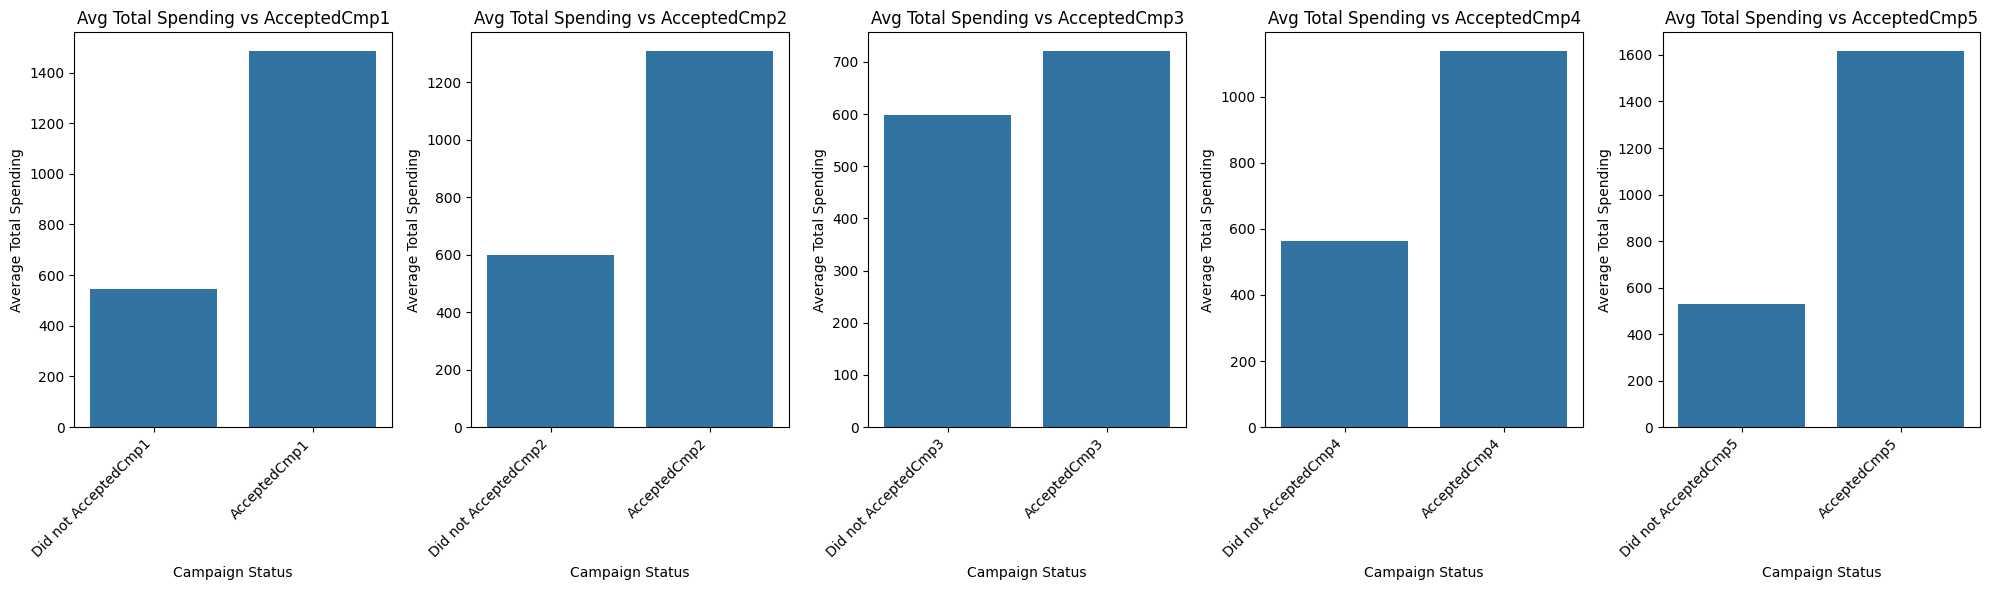

In [28]:
# bar plots for average total spending by campaign acceptance
plt.figure(figsize=(20, 6))
for i, (cmp, df) in enumerate(avg_wine_spending_by_campaign.items()):
    plt.subplot(1, 5, i + 1)
    sns.barplot(data=df, x='Campaign Status', y='Average Total Spending')
    plt.title(f'Avg Total Spending vs {cmp}')
    plt.ylabel('Average Total Spending')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Efektivitas Kampanye (Ringkas)

1. Tingkat Penerimaan

* **Cmp1 :** ≈ 6,4 %
* **Cmp2 :** ≈ 1,3 %  ← terendah
* **Cmp3 :** ≈ 7,4 %
* **Cmp4 :** ≈ 7,4 %  ← tertinggi
* **Cmp5 :** ≈ 7,3 %

2. Dampak pada Belanja

* Pelanggan **yang menerima** kampanye rata-rata membelanjakan **lebih besar** daripada yang menolak, menandakan kampanye efektif mendorong pembelian.
* Skala dampak (kenaikan rata-rata pengeluaran): **Cmp5 > Cmp1 ≈ Cmp4 > Cmp2 ≈ Cmp3**.

3. Catatan Outlier

* Usia & pendapatan ekstrem tidak dihapus; dapat menaikkan rata-rata kelompok *accepted*, tetapi justru menyoroti segmen **high-value** yang dipicu kampanye.

4. Rekomendasi Aksi

  1. **Perbaiki penargetan**—naikkan acceptance rate, khususnya untuk **Cmp2**.
  2. **Profilkan penerima berbelanja tinggi** guna menyempurnakan segmentasi dan pesan kampanye berikutnya.
  3. **Audit konten Cmp3** (dampak terkecil) untuk peningkatan penawaran.
  4. **Personalisasi** email/offers berdasarkan riwayat belanja agar relevan dan mudah diterima.
  5. Pantau metrik lanjutan—**konversi pasca-accept** & **retensi**—untuk menilai efektivitas jangka panjang.


## Analisis saluran penjualan (sales channel analysis)


In [29]:
# Kelompokkan data berdasarkan setiap saluran pembelian dan salin kolom yang diperlukan
spending_by_channel = supermarket_cleaned[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntTotal']].copy()

# Hitung rata-rata total pengeluaran per pembelian di setiap saluran
# Kita perlu menangani kasus di mana jumlah pembelian = 0 agar tidak terjadi pembagian dengan nol
avg_spending_web = (spending_by_channel['MntTotal'] / spending_by_channel['NumWebPurchases']).replace([np.inf, -np.inf], np.nan).mean() if spending_by_channel['NumWebPurchases'].sum() > 0 else 0
avg_spending_catalog = (spending_by_channel['MntTotal'] / spending_by_channel['NumCatalogPurchases']).replace([np.inf, -np.inf], np.nan).mean() if spending_by_channel['NumCatalogPurchases'].sum() > 0 else 0
avg_spending_store = (spending_by_channel['MntTotal'] / spending_by_channel['NumStorePurchases']).replace([np.inf, -np.inf], np.nan).mean() if spending_by_channel['NumStorePurchases'].sum() > 0 else 0
avg_spending_deals = (spending_by_channel['MntTotal'] / spending_by_channel['NumDealsPurchases']).replace([np.inf, -np.inf], np.nan).mean() if spending_by_channel['NumDealsPurchases'].sum() > 0 else 0

# Buat DataFrame untuk rata-rata pengeluaran per pembelian
avg_spending_per_purchase_df = pd.DataFrame({
    'Purchase Channel': ['Web', 'Catalog', 'Store', 'Deals'],
    'Average Spending Per Purchase': [avg_spending_web, avg_spending_catalog, avg_spending_store, avg_spending_deals]
})

# Kelompokkan data berdasarkan setiap saluran pembelian dan hitung rata-rata jumlah pembelian
avg_purchases_web = supermarket_cleaned['NumWebPurchases'].mean()
avg_purchases_catalog = supermarket_cleaned['NumCatalogPurchases'].mean()
avg_purchases_store = supermarket_cleaned['NumStorePurchases'].mean()
avg_purchases_deals = supermarket_cleaned['NumDealsPurchases'].mean()

# Buat DataFrame untuk rata-rata jumlah pembelian
avg_purchases_df = pd.DataFrame({
    'Purchase Channel': ['Web', 'Catalog', 'Store', 'Deals'],
    'Average Number of Purchases': [avg_purchases_web, avg_purchases_catalog, avg_purchases_store, avg_purchases_deals]
})

# Tampilkan hasil
print("Average Spending Per Purchase by Channel:")
display(avg_spending_per_purchase_df)

print("\nAverage Number of Purchases by Channel:")
display(avg_purchases_df)

Average Spending Per Purchase by Channel:


,Purchase Channel,Average Spending Per Purchase
0,Web,139.991822
1,Catalog,238.614206
2,Store,90.439738
3,Deals,411.586378



Average Number of Purchases by Channel:


,Purchase Channel,Average Number of Purchases
0,Web,4.085289
1,Catalog,2.671029
2,Store,5.800993
3,Deals,2.323556


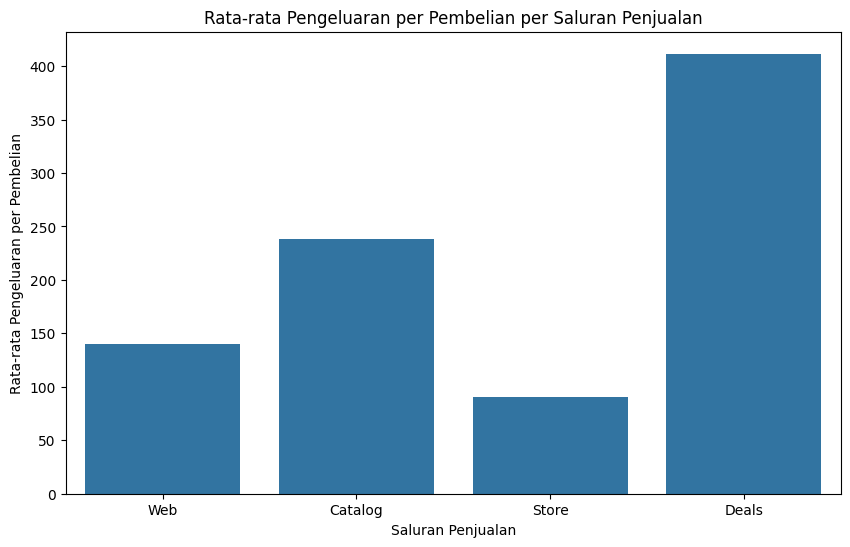

In [30]:
# bar plot untuk membandingkan rata-rata total pengeluaran per pembelian di setiap saluran penjualan.
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_spending_per_purchase_df, x='Purchase Channel', y='Average Spending Per Purchase')
plt.title('Rata-rata Pengeluaran per Pembelian per Saluran Penjualan')
plt.xlabel('Saluran Penjualan')
plt.ylabel('Rata-rata Pengeluaran per Pembelian')
plt.show()

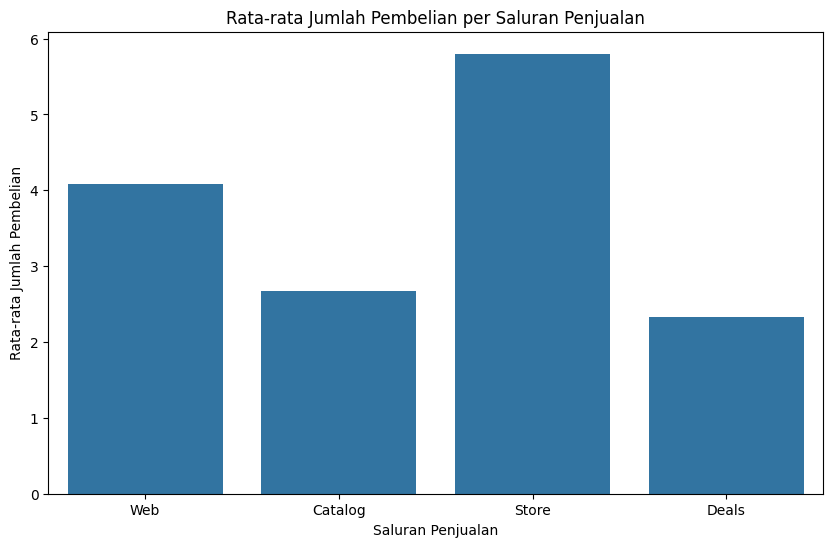

In [31]:
# bar plot untuk membandingkan rata-rata jumlah pembelian di setiap saluran penjualan.
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_purchases_df, x='Purchase Channel', y='Average Number of Purchases')
plt.title('Rata-rata Jumlah Pembelian per Saluran Penjualan')
plt.xlabel('Saluran Penjualan')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.show()

Interpretasi Analisis Perilaku Pembelian per Saluran Penjualan:

Perbandingan Rata-rata Pengeluaran per Pembelian:
- Saluran 'Deals' menunjukkan rata-rata pengeluaran per pembelian tertinggi (411.59). Hal ini mungkin karena pelanggan cenderung membeli produk dengan harga lebih tinggi saat ada diskon atau promosi deals.
- Saluran 'Catalog' berada di posisi kedua dengan rata-rata pengeluaran per pembelian (238.61), yang mungkin menunjukkan pelanggan yang berbelanja melalui katalog cenderung membeli item dengan nilai lebih tinggi atau dalam jumlah yang lebih besar.
- Saluran 'Web' memiliki rata-rata pengeluaran per pembelian yang lebih rendah (139.99) dibandingkan Deals dan Catalog, tetapi lebih tinggi dari Store.
- Saluran 'Store' memiliki rata-rata pengeluaran per pembelian terendah (90.44). Ini mungkin mencerminkan pembelian item dengan harga lebih rendah atau pembelian dalam jumlah kecil saat berbelanja langsung di toko.

Perbandingan Rata-rata Jumlah Pembelian:
- Saluran 'Store' memiliki rata-rata jumlah pembelian tertinggi (5.80). Ini menunjukkan bahwa meskipun pengeluaran per pembelian rendah, pelanggan sering melakukan transaksi di toko fisik.
- Saluran 'Web' berada di posisi kedua dengan rata-rata jumlah pembelian (4.09).
- Saluran 'Catalog' dan 'Deals' memiliki rata-rata jumlah pembelian yang lebih rendah (2.67 dan 2.32). Ini mungkin karena pembelian melalui saluran ini kurang sering dilakukan dibandingkan toko fisik atau web.

Implikasi:
- Saluran 'Store' menyumbang jumlah transaksi (pembelian) terbanyak, tetapi dengan nilai per transaksi yang rendah. Ini menunjukkan pentingnya toko fisik sebagai titik kontak utama bagi pelanggan, meskipun untuk pembelian dengan nilai kecil.
- Saluran 'Deals' dan 'Catalog', meskipun memiliki jumlah transaksi yang lebih sedikit, menyumbang rata-rata pengeluaran per transaksi yang lebih tinggi. Ini menunjukkan bahwa pelanggan yang menggunakan saluran ini cenderung melakukan pembelian bernilai lebih tinggi.
- Saluran 'Web' berada di tengah, dengan jumlah transaksi yang cukup tinggi dan rata-rata pengeluaran per transaksi yang moderat.

Catatan Outlier
Transaksi & pendapatan ekstrem bisa menaikkan rata-rata Deals/Catalog, namun pola perbandingan antarsaluran tetap jelas.

Actionable Recommendations Terkait Saluran Penjualan:
1. Untuk saluran 'Store': Fokus pada peningkatan nilai transaksi rata-rata melalui strategi seperti penempatan produk berharga tinggi di area yang terlihat, menawarkan bundling produk, atau program loyalitas yang mendorong pembelian lebih besar per kunjungan.
2. Untuk saluran 'Deals' dan 'Catalog': Karena menyumbang pengeluaran per pembelian yang tinggi, pertimbangkan untuk meningkatkan promosi dan penawaran eksklusif melalui saluran ini untuk mendorong transaksi bernilai tinggi lebih lanjut. Pastikan pengalaman pengguna di kedua saluran ini dioptimalkan untuk pembelian besar.
3. Untuk saluran 'Web': Terus tingkatkan pengalaman pengguna dan personalisasi penawaran online untuk mendorong peningkatan rata-rata pengeluaran per kunjungan. Manfaatkan data perilaku penjelajahan untuk merekomendasikan produk bernilai lebih tinggi.
4. Lakukan analisis lebih lanjut untuk memahami karakteristik pelanggan yang memilih saluran 'Deals' dan 'Catalog'. Ini dapat membantu dalam menargetkan promosi deals dan katalog secara lebih efektif kepada segmen pelanggan yang paling responsif.
5. Monitor kinerja setiap saluran secara berkala, tidak hanya berdasarkan jumlah pembelian dan pengeluaran rata-rata, tetapi juga profitabilitas untuk mengoptimalkan alokasi sumber daya dan strategi pemasaran.